# YouTube Video Engagement and Metrics Analysis

## Overview

In this notebook, we will explore and analyze a dataset containing detailed engagement metrics for YouTube videos. The dataset includes a variety of key performance indicators such as views, likes, comments, shares, and other user interactions over time. By answering important questions about video performance, viewer engagement, and audience behavior, we aim to uncover insights that can help content creators, marketers, and data enthusiasts better understand what drives YouTube success.

## Key Questions Explored:
1. Which videos had the highest engagement (views, likes, comments, and shares)?
2. Is there a relationship between views and average view duration?
3. What is the impact of annotations and cards on engagement?
4. Are viewers more likely to click on cards or teaser cards?
5. What drives subscriber gains and losses?
6. Which videos caused the most significant subscriber losses?
7. How has engagement changed over time?
8. Are there seasonal trends in video performance?

## Dataset
The dataset contains engagement metrics for individual videos across a variety of YouTube channels. The key features include:
- **video_id**: Unique identifier for each YouTube video
- **day**: Date of the video engagement data
- **views**: Total number of views on that day
- **likes**: Number of likes received on that day
- **comments**: Number of comments made on that day
- **shares**: Number of times the video was shared
- **subscribersGained**: Number of new subscribers gained due to the video
- **subscribersLost**: Number of subscribers lost due to the video
- And many more engagement-related metrics such as annotations, cards, and average view duration.

By the end of this analysis, we will have a clear understanding of the factors that contribute to a video’s success on YouTube, including user interactions, content features, and temporal patterns.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/home/yaseen/data sets/youtube/all_youtube_analytics.csv')
data.head()



,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

<Axes: >

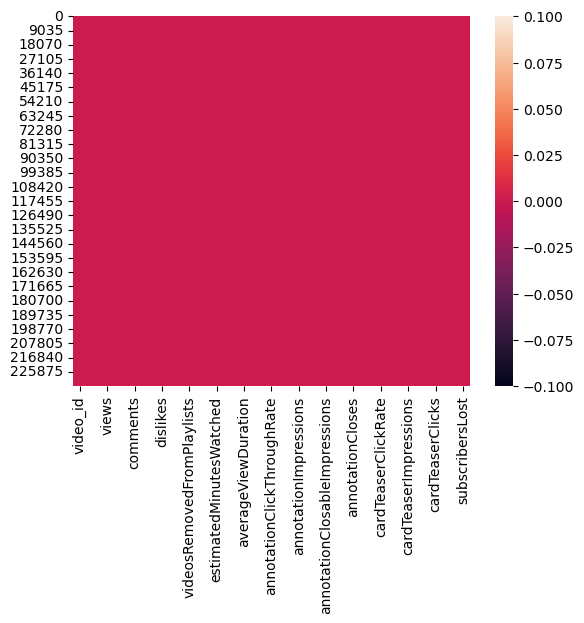

In [105]:
sns.heatmap(data.isna())

## Which videos had the highest engagement (views, likes, comments, and shares)?

/tmp/ipykernel_7544/2032205341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_views.index, y=top_views.values, palette='viridis')


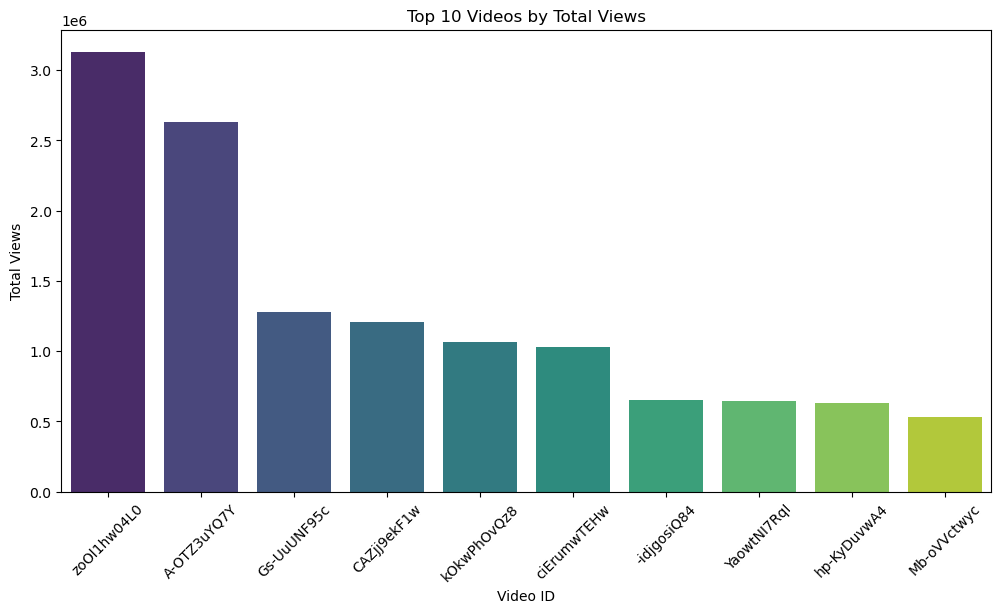

In [107]:
# Top 10 videos by views
top_views = data.groupby('video_id')['views'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_views.index, y=top_views.values, palette='viridis')
plt.title("Top 10 Videos by Total Views")
plt.xlabel("Video ID")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.show()


## Is there a relationship between views and average view duration?

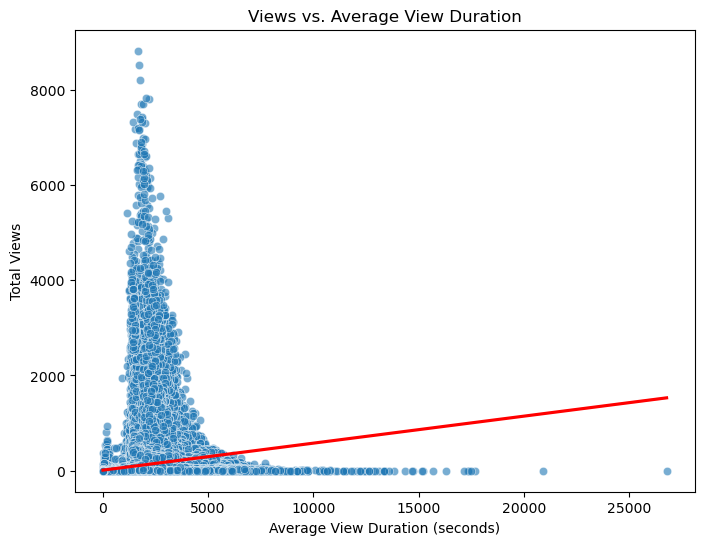

In [109]:
# Scatter plot showing the relationship between views and average view duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='averageViewDuration', y='views', data=data, alpha=0.6)
sns.regplot(x='averageViewDuration', y='views', data=data, scatter=False, color='red')
plt.title("Views vs. Average View Duration")
plt.xlabel("Average View Duration (seconds)")
plt.ylabel("Total Views")
plt.show()


## What is the impact of annotations and cards on engagement?

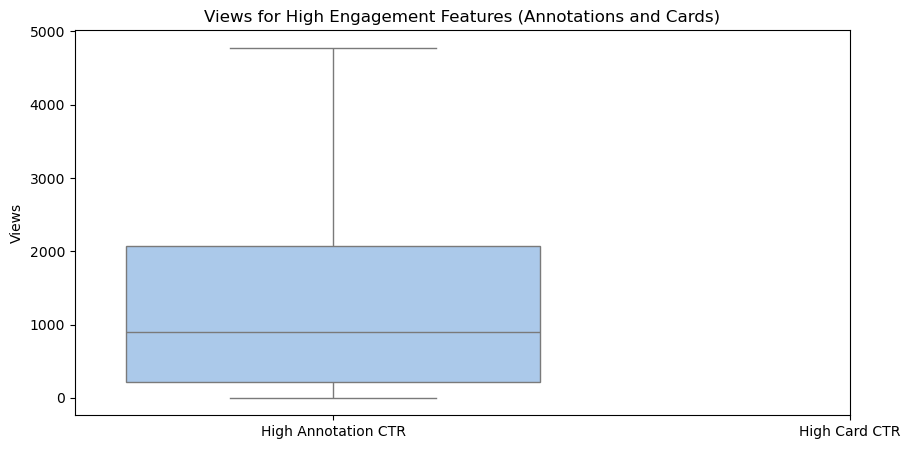

In [111]:
# Filter data for high annotation and card CTRs
high_annotation = data[data['annotationClickThroughRate'] > 0.05]
high_card = data[data['cardClickRate'] > 0.05]

# Compare views for high annotation and high card CTR videos
plt.figure(figsize=(10, 5))
sns.boxplot(data=[high_annotation['views'], high_card['views']], palette='pastel')
plt.xticks([0, 1], ['High Annotation CTR', 'High Card CTR'])
plt.ylabel("Views")
plt.title("Views for High Engagement Features (Annotations and Cards)")
plt.show()


## Are viewers more likely to click on cards or teaser cards?

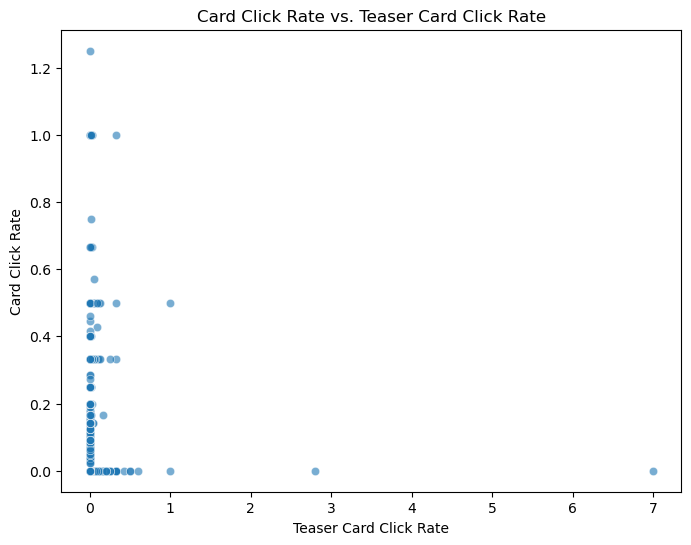

In [113]:
# Scatter plot comparing card and teaser card click-through rates
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cardTeaserClickRate', y='cardClickRate', data=data, alpha=0.6)
plt.title("Card Click Rate vs. Teaser Card Click Rate")
plt.xlabel("Teaser Card Click Rate")
plt.ylabel("Card Click Rate")
plt.show()


## What drives subscriber gains and losses?

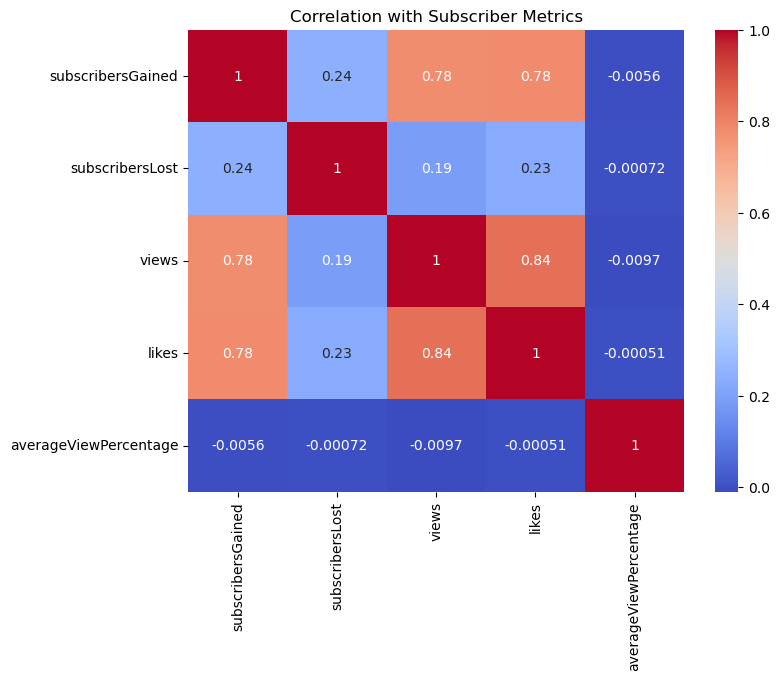

In [115]:
# Correlation heatmap to identify relationships
subscriber_corr = data[['subscribersGained', 'subscribersLost', 'views', 'likes', 'averageViewPercentage']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(subscriber_corr, annot=True, cmap='coolwarm')
plt.title("Correlation with Subscriber Metrics")
plt.show()


## Which videos caused the most significant subscriber losses?

/tmp/ipykernel_7544/780369448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_losses.index, y=top_losses.values, palette='Reds')


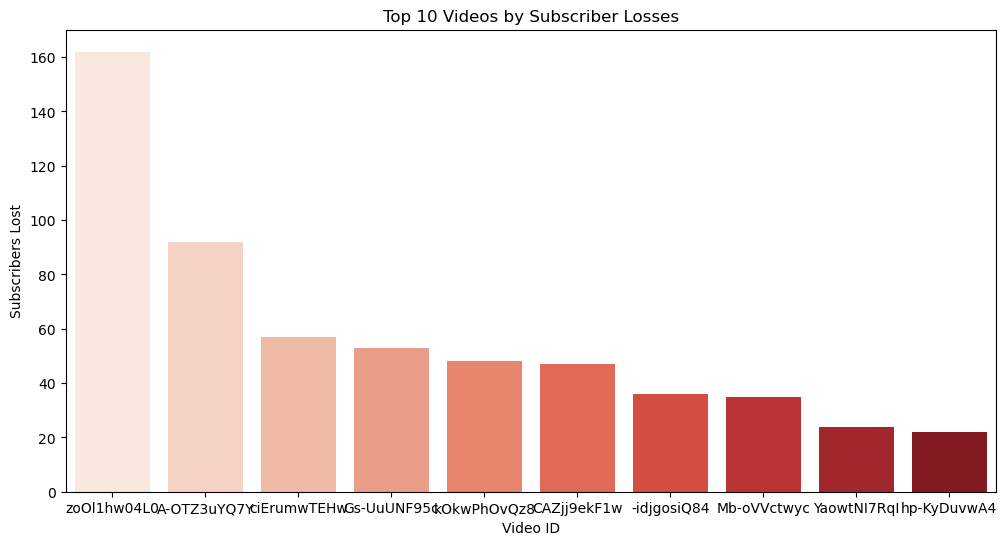

In [117]:
# Top videos by subscriber losses
top_losses = data.groupby('video_id')['subscribersLost'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_losses.index, y=top_losses.values, palette='Reds')
plt.title("Top 10 Videos by Subscriber Losses")
plt.xlabel("Video ID")
plt.ylabel("Subscribers Lost")
plt.show()


##  How has engagement changed over time?

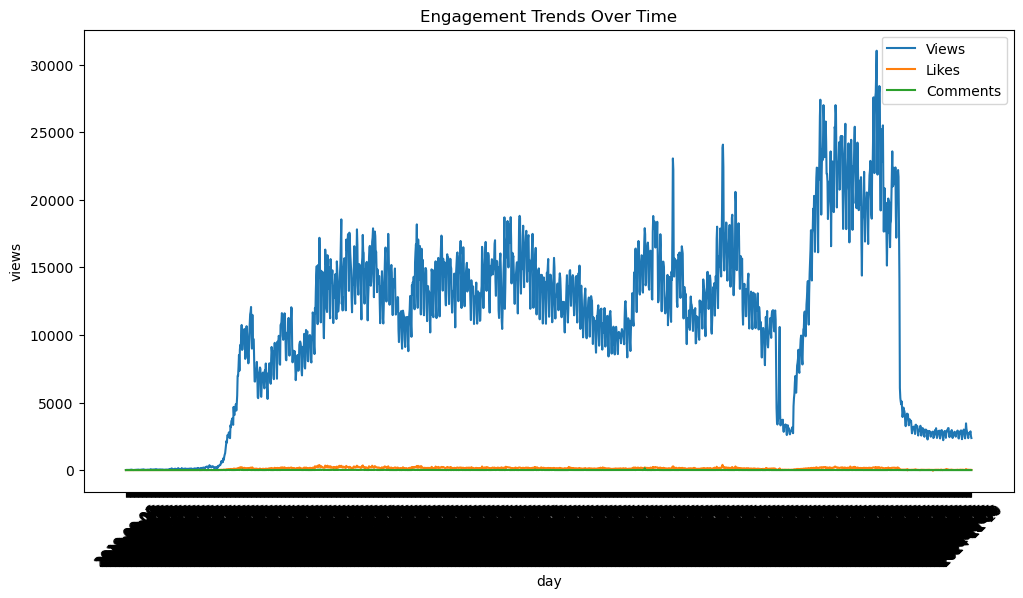

In [119]:
# Aggregate data by day to get total engagement metrics
daily_totals = data.groupby('day').sum()

# Plot total engagement over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_totals, x=daily_totals.index, y='views', label="Views")
sns.lineplot(data=daily_totals, x=daily_totals.index, y='likes', label="Likes")
sns.lineplot(data=daily_totals, x=daily_totals.index, y='comments', label="Comments")
plt.xticks(rotation=45)
plt.title("Engagement Trends Over Time")
plt.legend()
plt.show()


## Are there seasonal trends in video performance?

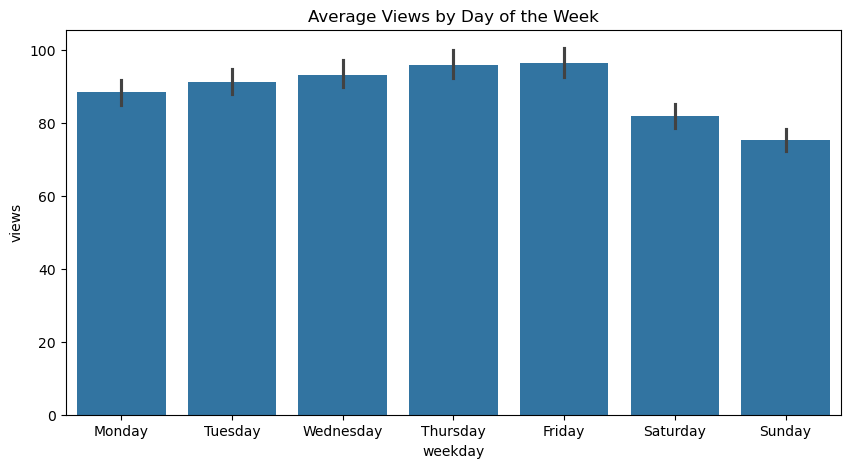

In [121]:
# Add month and weekday columns
data['month'] = pd.to_datetime(data['day']).dt.month_name()
data['weekday'] = pd.to_datetime(data['day']).dt.day_name()

# Plot average views by weekday
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='views', data=data, estimator='mean', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Average Views by Day of the Week")
plt.show()
